# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from datetime import datetime, timedelta
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi.newsapi_client import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/whitneyturner/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=os.environ["news_api"])

In [4]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
btc_articles = newsapi.get_everything(q='bitcoin',
                                       language='en')

In [5]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_articles = newsapi.get_everything(q='ethereum',
                                       language='en')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        bitcoin_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
btc_df = btc_df[cols]

btc_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.4215,0.0,0.902,0.098,PayPal will now allow users outside the U.S. t...
1,0.4019,0.0,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
2,0.1779,0.0,0.948,0.052,A recently-installed Bitcoin ATM.\r\n\n \n\n A...
3,0.6187,0.0,0.847,0.153,Retailers are increasingly accepting cryptocur...
4,0.1280,0.0,0.954,0.046,The government of El Salvador purchased at lea...


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in eth_articles["articles"]:
    try:
        sentiment = analyzer.polarity_scores(article['content'])
      
        Ethereum_sentiments.append({
            "Text": article["content"],
            "Compound": sentiment["compound"],
            "Positive": sentiment["pos"],
            "Negative": sentiment["neg"],
            "Neutral": sentiment["neu"]
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols =["Compound", "Negative", "Neutral", "Positive", "Text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,Text
0,0.7351,0.000,0.833,0.167,As the broader crypto world enjoys a late summ...
1,0.4215,0.000,0.902,0.098,PayPal will now allow users outside the U.S. t...
2,0.6908,0.000,0.839,0.161,"PayPal is bringing the ability to buy, hold an..."
3,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe..."
4,-0.1027,0.043,0.957,0.000,One of the most unusual cryptocurrency heists ...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.157615,0.032000,0.901800,0.066200
std,0.394437,0.067198,0.062426,0.048477
min,-0.886000,0.000000,0.729000,0.000000
25%,0.038700,0.000000,0.869250,0.047500
50%,0.152950,0.000000,0.907000,0.052500
75%,0.421500,0.043000,0.948750,0.095250
max,0.690800,0.271000,1.000000,0.161000


In [9]:
 # Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.208305,0.013200,0.92105,0.065700
std,0.322790,0.028787,0.05139,0.056003
min,-0.440400,0.000000,0.83300,0.000000
25%,0.000000,0.000000,0.89250,0.000000
50%,0.226300,0.000000,0.92250,0.062000
75%,0.445000,0.000000,0.95250,0.095000
max,0.735100,0.094000,1.00000,0.167000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH

Q: Which coin had the highest compound score?

A: ETH

Q. Which coin had the highest positive score?

A: ETH

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
addl_stopwords = [',', '', 'https', 'http', 'btc', 'bitcoin', 'eth', 'ethereum']

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    text = word_tokenize(text)
    
    # Convert the words to lowercase
    text = [word.lower() for word in text]
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    text = [regex.sub('', word) for word in text]
    
    # Remove the stop words    
    sw = set(stopwords.words('english') + addl_stopwords)

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]
    text = [word for word in text if word not in sw]
    return text

In [17]:
from nltk.stem.snowball import SnowballStemmer

In [18]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
# Create a new tokens column for bitcoin
btc_tokens = []
[btc_tokens.append(tokenizer(text)) for text in btc_df.Text]   
btc_df['Tokens'] = btc_tokens
btc_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.4215,0.0,0.902,0.098,PayPal will now allow users outside the U.S. t...,"[paypal, allow, user, outside, u, buy, hold, s..."
1,0.4019,0.0,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[photo, joe, raedlegetty, image, twitter, squa..."
2,0.1779,0.0,0.948,0.052,A recently-installed Bitcoin ATM.\r\n\n \n\n A...,"[recentlyinstalled, atm, today, official, curr..."
3,0.6187,0.0,0.847,0.153,Retailers are increasingly accepting cryptocur...,"[retailer, increasingly, accepting, cryptocurr..."
4,0.1280,0.0,0.954,0.046,The government of El Salvador purchased at lea...,"[government, el, salvador, purchased, least, r..."


In [19]:
# Create a new tokens column for ethereum
eth_tokens = []
[eth_tokens.append(tokenizer(text)) for text in eth_df.Text]   
eth_df['Tokens'] = eth_tokens
eth_df.head()

,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.7351,0.000,0.833,0.167,As the broader crypto world enjoys a late summ...,"[broader, crypto, world, enjoys, late, summer,..."
1,0.4215,0.000,0.902,0.098,PayPal will now allow users outside the U.S. t...,"[paypal, allow, user, outside, u, buy, hold, s..."
2,0.6908,0.000,0.839,0.161,"PayPal is bringing the ability to buy, hold an...","[paypal, bringing, ability, buy, hold, sell, c..."
3,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe...","[bell, today, coinbase, reported, another, per..."
4,-0.1027,0.043,0.957,0.000,One of the most unusual cryptocurrency heists ...,"[one, unusual, cryptocurrency, heist, recent, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in btc_df.Tokens]
dict(btc_bigram_counts[0].most_common(10))

{('paypal', 'allow'): 1,
 ('allow', 'user'): 1,
 ('user', 'outside'): 1,
 ('outside', 'u'): 1,
 ('u', 'buy'): 1,
 ('buy', 'hold'): 1,
 ('hold', 'sell'): 1,
 ('sell', 'cryptocurrency'): 1,
 ('cryptocurrency', 'first'): 1,
 ('first', 'time'): 1}

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = [Counter(ngrams(tokens, n=2)) for tokens in eth_df.Tokens]
dict(eth_bigram_counts[0].most_common(10))

{('broader', 'crypto'): 1,
 ('crypto', 'world'): 1,
 ('world', 'enjoys'): 1,
 ('enjoys', 'late'): 1,
 ('late', 'summer'): 1,
 ('summer', 'surge'): 1,
 ('surge', 'enthusiasm'): 1,
 ('enthusiasm', 'blockchain'): 1,
 ('blockchain', 'developer'): 1,
 ('developer', 'taken'): 1}

In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
bigstr = []
for tokens in btc_df.Tokens:
    bigstr += tokens
btc_token_count = token_count(bigstr)
btc_token_count

[('char', 18), ('cryptocurrency', 11), ('el', 10)]

In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
bigstr = []
for tokens in eth_df.Tokens:
    bigstr += tokens
eth_token_count = token_count(bigstr)
eth_token_count

[('char', 20), ('ha', 8), ('cryptocurrency', 6)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

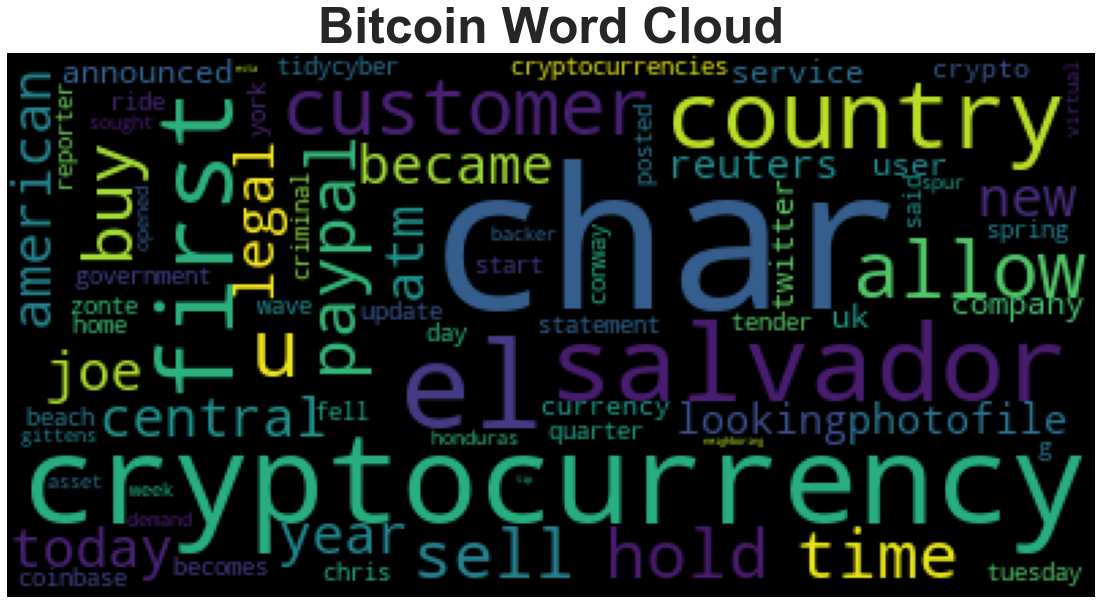

In [27]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_corpus = ''
sw = set(stopwords.words('english') + addl_stopwords)
for token in btc_df.Text:
    btc_corpus += token
long_string = " ".join(str(x) for x in tokenizer(btc_corpus))
wc = WordCloud(collocations=False).generate(long_string)
plt.title('Bitcoin Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

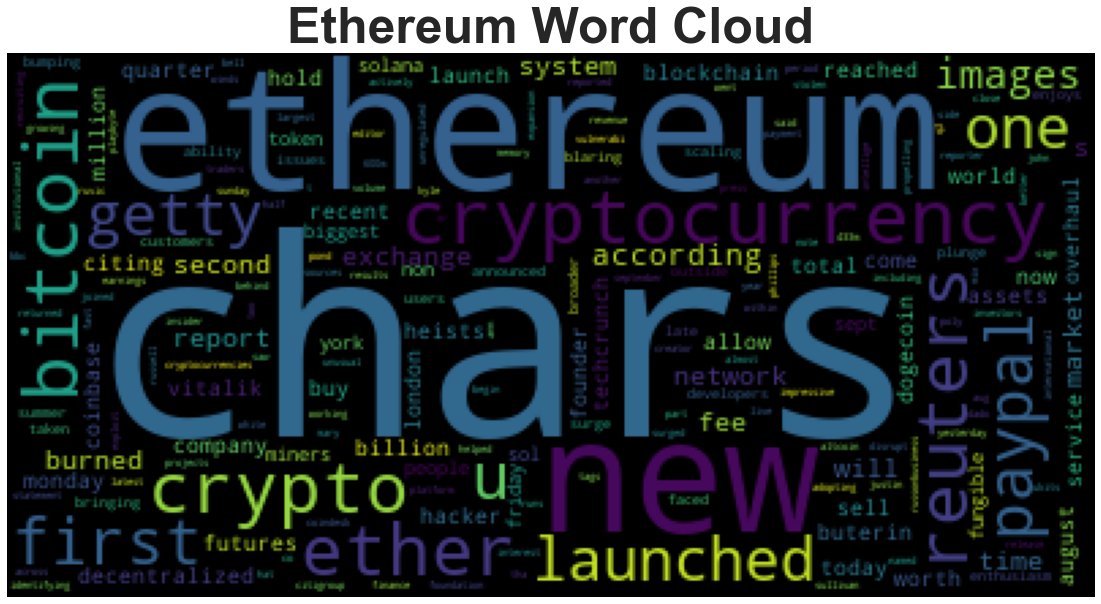

In [28]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_corpus = ''
for token in eth_df.Text:
    eth_corpus += token.lower()
long_string = " ".join(str(x) for x in tokenizer(eth_corpus))
wc = WordCloud(collocations=False).generate(eth_corpus)
plt.title('Ethereum Word Cloud', fontsize=50, fontweight='bold')
plt.style.use('seaborn-whitegrid')
plt.imshow(wc)
plt.axis("off")
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [29]:
import spacy
from spacy import displacy

In [30]:
# Download the language model for SpaCy
#python -m spacy download en_core_web_sm

In [31]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [32]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
btc_corpus

'PayPal will now allow users outside the U.S. to buy, hold and sell cryptocurrency for the first time. The company announced today the launch of a new service that will allow customers in the U.K. to … [+4420 chars]Photo by Joe Raedle/Getty Images\r\n\n \n\n Twitter and Square CEO Jack Dorsey, a noted superfan of Bitcoin, claimed on Monday that the cryptocurrency will eventually unite the world. Yes, really.\nOn Mond… [+2119 chars]A recently-installed Bitcoin ATM.\r\n\n \n\n As of today, Bitcoin is an official currency of El Salvador alongside the US dollar, after the Central American country became the first to adopt the cryptocur… [+2716 chars]Retailers are increasingly accepting cryptocurrency for physical items, but did you know\xa0you can spend crypto on ephemeral experiences like travel too? As more cryptocurrency holders indicate a willi… [+2783 chars]The government of El Salvador purchased at least 200 bitcoin recently, ahead of the country officially recognizing bitcoin as a f

In [33]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_ner = nlp(btc_corpus)

# Add a title to the document
# YOUR CODE HERE!
btc_ner.user_data["title"] = "Bitcoin NER"

In [34]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_ner, style='ent')

In [35]:
# List all Entities
# YOUR CODE HERE!
btc_ents = set([ent.text for ent in btc_ner.ents ])
btc_ents

{'$2.23 billion',
 '$43,000 mark',
 '+1733',
 '2,100',
 '27',
 '43,050',
 'ATM',
 'August 6, 2021',
 'Bitcoin',
 'Bitcoin ATM',
 'Bitcoin Beach',
 'CNN',
 'Central American',
 'Chris',
 'Coinbase',
 'Coinbase’s',
 'Conway G. Gittens',
 'El Salvador',
 'El Salvadors',
 'El Zonte',
 'Honduras',
 'Jack Dorsey',
 'Joe',
 'Joe Raedle/Getty Images',
 'June',
 'Monday',
 'New York Tuesda',
 'PayPal',
 'Rebecca McMackin',
 'Reuters',
 'September',
 'Taxi',
 'Tuesday',
 'Twitter',
 'U.K.',
 'U.S.',
 'UK',
 'US',
 'a month',
 'a year',
 'about 10%',
 'almost 2,500',
 'as much as 17',
 'at least 200',
 'chars]T-Mobile',
 'earlier this year',
 'first',
 'four',
 'its second quarter',
 'just days',
 'roughly 49 million',
 'spring',
 'the quarter',
 'this week',
 'today',
 'two years'}

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---